In [3]:

import os
os.environ["OMP_NUM_THREADS"] = "1"
import sklearn
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 


data = pd.read_csv(r'C:\Users\CH HARITHA\Downloads\US_violent_crime.csv') 
data.rename(columns={"Unnamed: 0": "States"}, inplace=True) 
data.dropna(inplace=True) 
features = ['Murder', 'Assault', 'Rape'] 


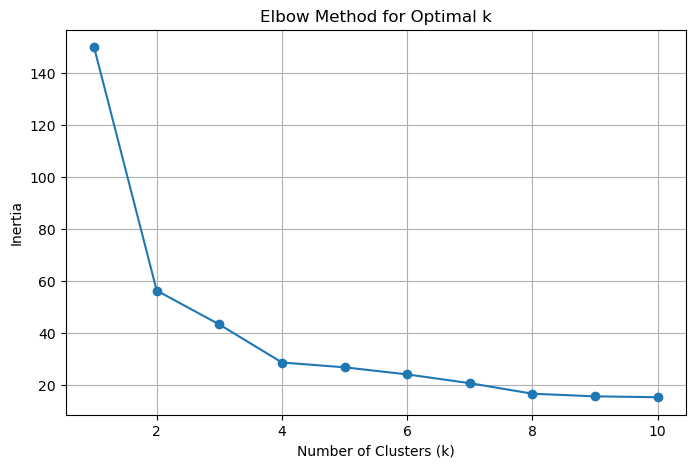

In [4]:
X = data[features] 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
inertia = [] 
k_range = range(1, 11) 
for k in k_range: 
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(X_scaled) 
    inertia.append(kmeans.inertia_) 
plt.figure(figsize=(8, 5)) 
plt.plot(k_range, inertia, marker='o') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia') 
plt.title('Elbow Method for Optimal k') 
plt.grid(True) 
plt.show() 

Clusters for each state:
            States  Cluster
0          Alabama        1
1           Alaska        2
2          Arizona        2
3         Arkansas        3
4       California        2
5         Colorado        2
6      Connecticut        0
7         Delaware        3
8          Florida        1
9          Georgia        1
10          Hawaii        3
11           Idaho        0
12        Illinois        1
13         Indiana        3
14            Iowa        0
15          Kansas        3
16        Kentucky        3
17       Louisiana        1
18           Maine        0
19        Maryland        1
20   Massachusetts        3
21        Michigan        2
22       Minnesota        0
23     Mississippi        1
24        Missouri        3
25         Montana        3
26        Nebraska        3
27          Nevada        2
28   New Hampshire        0
29      New Jersey        3
30      New Mexico        2
31        New York        1
32  North Carolina        1
33    North Dakota     

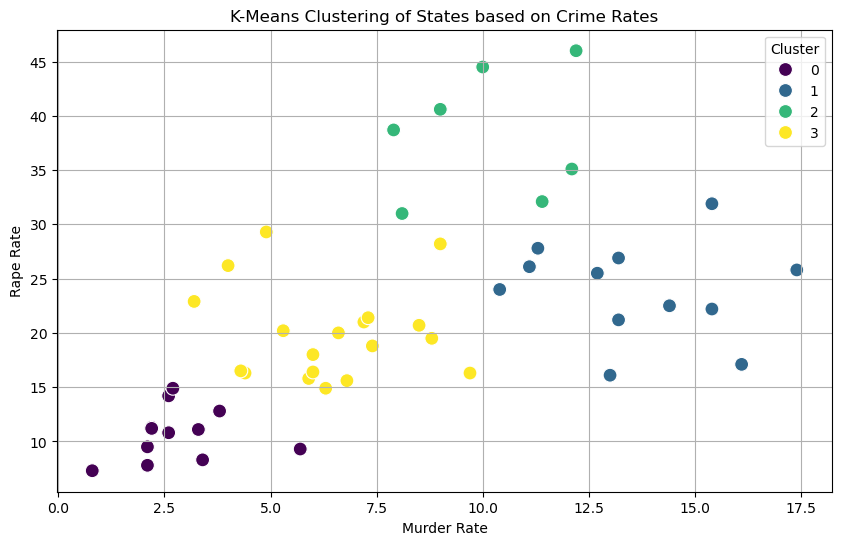

In [5]:

optimal_k = 4  # Replace with your choice from the elbow plot 
kmeans = KMeans(n_clusters=optimal_k, random_state=42) 
kmeans.fit(X_scaled) 
data['Cluster'] = kmeans.labels_ 
print("Clusters for each state:") 
state_clusters = data[['States', 'Cluster']] 
print(state_clusters) 
plt.figure(figsize=(10, 6)) 
sns.scatterplot( 
    x=data['Murder'], y=data['Rape'], hue=data['Cluster'], palette='viridis', s=100 
) 
plt.title('K-Means Clustering of States based on Crime Rates') 
plt.xlabel('Murder Rate') 
plt.ylabel('Rape Rate') 
plt.legend(title='Cluster') 
plt.grid(True) 
plt.show() 

In [21]:
def predict_crime(row): 
    max_crime = row[['Murder_scaled', 'Assault_scaled', 'Rape_scaled']].idxmax()  # Fix: Separate statements
    crime_mapping = {  
        'Murder_scaled': 'Murder',  
        'Assault_scaled': 'Assault',  
        'Rape_scaled': 'Rape'  
    }  
    return crime_mapping[max_crime]  
scaled_data = pd.DataFrame(X_scaled, columns=[f"{col}_scaled" for col in features])  

data['Predicted_Crime'] = scaled_data.apply(predict_crime, axis=1)  

predicted_crime_output = data[['States', 'Predicted_Crime']]  
print(predicted_crime_output)  

full_file_path = r'C:\Users\CH HARITHA\OneDrive\Desktop\CRT\Crime_Rate_Analysis_Full.csv'  


final_data = pd.concat([data, scaled_data], axis=1)  


final_data.to_csv(full_file_path, index=False)  

print(f"Full analysis data saved to '{full_file_path}'")


            States Predicted_Crime
0          Alabama          Murder
1           Alaska            Rape
2          Arizona         Assault
3         Arkansas          Murder
4       California            Rape
5         Colorado            Rape
6      Connecticut         Assault
7         Delaware         Assault
8          Florida         Assault
9          Georgia          Murder
10          Hawaii            Rape
11           Idaho         Assault
12        Illinois         Assault
13         Indiana            Rape
14            Iowa            Rape
15          Kansas            Rape
16        Kentucky          Murder
17       Louisiana          Murder
18           Maine         Assault
19        Maryland         Assault
20   Massachusetts         Assault
21        Michigan            Rape
22       Minnesota            Rape
23     Mississippi          Murder
24        Missouri            Rape
25         Montana          Murder
26        Nebraska            Rape
27          Nevada  